In [43]:
import numpy as np
import matplotlib.pyplot as plt


In [44]:
# i. Generate Samples
N = 150
mean = 0.0
standard_deviation = 10.0
x = np.zeros(N)
for i in range(N):
    x[i] = i

sample_points = np.random.normal(mean, standard_deviation, N)

In [45]:
# ii. Construct a Design Matrix
num_features = 3
rows = N
cols = num_features
features = [1,1,2]
X = np.zeros((N, num_features))

#Design Matrix
for i in range(N):
    X[i][0] = 1

for i in range(1,len(features)):
    for j in range(N):
        X[j][i] = pow(sample_points[j],features[i])

In [46]:
#iii. Sample True values using Uniform Distribution
low = mean
high = standard_deviation
true_params = np.random.uniform(low, high, N)

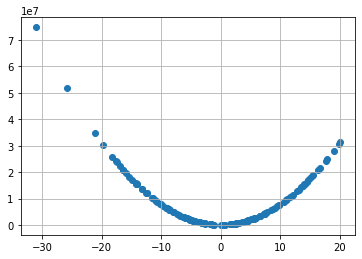

In [47]:
# iv... Use the design matrix and the true_values to create the y-values
true_params = true_params.transpose()
y_values = true_params.dot(X)

y = np.zeros(N)

for i in range(N):
    y[i] = y_values[0] + y_values[1] * sample_points[i] + y_values[2] * pow(sample_points[i],2) 

plt.scatter(sample_points, y)
plt.grid(True)
plt.show()


# Part (b)

## Use the Moore - Penrose pseudo - inverse to calculate the closed form solution

In [48]:
# i...
theta = (np.linalg.inv(X.transpose().dot(X))).dot(X.transpose()).dot(y)
print(theta)

[  740.82812175  -391.94593726 77659.88778828]


(150, 3)


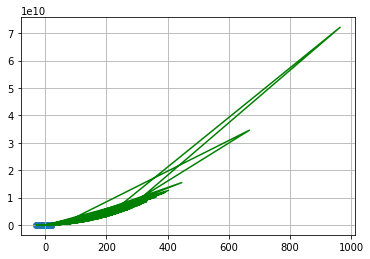

In [69]:
# ii...Learned parameters to the true params
new_y = np.zeros((N,num_features))

#Design Matrix
print(np.shape(new_y))
for i in range(N):
    X[i][0] = 1

for i in range(1,len(features)):
    for j in range(N):
        X[j][i] = pow(sample_points[j],features[i])
        
for i in range(num_features):
    for j in range(N):
        new_y[j][i] = theta[0] + theta[1] * X[j][i] + theta[2] * pow(X[j][i],2)

plt.scatter(sample_points, y)
plt.plot(X,new_y,'g')
plt.grid(True)
plt.show()


# Get the Error 

SSE = 0.0
for i in range(N):
    SSE += 0.5 * (pow(new_y[i] - y[i],2))
    
